## Ejercicio 1:
Resolver con Runge-Kutta orden 4 el sistema:
\begin{align*}
\dot x &= y-y^3\\
\dot y &= -x -y^2
\end{align*}
* Grafiquen muchas trayectorias en el espacio de fase, utilizando condiciones iniciales aleatorias.

In [1]:
# Podemos adaptar la función mostrada arriba para Euler independiente de las dimensiones del sistema, en este caso para el método de Runge-Kutta.
function metodo_Runge_Kutta(f,list,x0)    # Función metodo_Runge_Kutta cuyas entradas son la función f, list que es el intervalo de tiempo y el punto inicial x0.
    x = x0                          # Condición inicial
    h = list[2]-list[1]             # El tamaño de paso h se obtiene de restar los primeros 2 elementos de la lista.
    listx = []                      # Arreglo vacío que guardará los resultados obtenidos con este método.
    push!(listx,x)                  # Agregamos al arreglo listx, el punto inicial con push
    for i in 2:length(list)         # Ciclo for que implementará las fórmulas de recurrencia mostrada arriba para el método de Runge-Kutta 
        t = i*h
        k1 = f(x,t);
        k2 = f(x+(h/2)*k1,t+(h/2));
        k3 = f(x+(h/2)*k2, t+(h/2));
        k4 = f(x+h*k3, t);
        x = x+(h/6)*(k1+2*k2+2*k3+k4);
        push!(listx,x)              # Para cada vuelta del ciclo, se agrega el resultado obtenido al arreglo listx 
    end
    return listx                    # La función metodo_euler regresa listx
end

metodo_Runge_Kutta (generic function with 1 method)

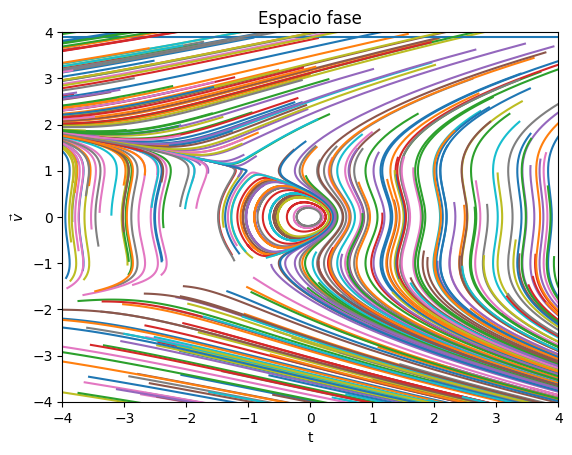

In [12]:
f(x,t) = [x[2]-(x[2])^3, -x[1]-(x[2])^2] # Función de 2 dimensiones

# Para poder graficar muchas condiciones iniciales
using PyPlot
list = -1:0.01:10                        # Intervalo sobre el cual vamos a trabajar
for i in 1:500                           # Vamos a graficar 500 condiciones iniciales
    w = 0.01*rand(-500:500,2,1)          
    y1 = metodo_Runge_Kutta(f,list,w);   # El vector y1 contiene la solución de nuestro sistema con las condiciones iniciales aleatorias para cada vuelta del ciclo.
    flistx1_kutta = map(x->x[1],y1);   
    flistx2_kutta = map(x->x[2],y1);  
    title("Espacio fase")
    xlabel("t")
    ylabel(L"\vec{v}")  
    plot(flistx1_kutta,flistx2_kutta);
    xmin, xmax = xlim()                  # Cambiando la escala de nuestra gráfica
    ymin, ymax = ylim()
    xlim( -4, 4)    
    ylim( -4, 4)
end

* Calculen el Jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$ y evaluenlo en $\vec 0$, el cual es un punto fijo. Calculen $\Delta$ y $\tau$ e indiquen que tipo de punto fijo es el $\vec 0$.

El jacobiano de una función $\vec F=({ F }_{ 1 }(x,y),{ F }_{ 2 }(x,y))$, está dado por:

$${ J }_{ F }=\begin{bmatrix} \frac { \partial { F }_{ 1 } }{ \partial x }  & \frac { \partial { F }_{ 1 } }{ \partial y }  \\ \frac { \partial { F }_{ 2 } }{ \partial x }  & \frac { \partial { F }_{ 2 } }{ \partial y }  \end{bmatrix} $$

Considerando ${ F }_{ 1 }=y-y^3$ y ${ F }_{ 2 }=-x-y^2$, tenemos:

$${ J }_{ F }=\begin{bmatrix} 0 & \quad 1-3y^{ 2 } \\ -1 & \quad -2y \end{bmatrix}$$

Evaluandolo en $\vec 0$, obtenemos:

$${ J }_{ F }=\begin{bmatrix} 0 & \quad 1 \\ -1 & \quad 0 \end{bmatrix}$$

Calculando el determinante ($\Delta$):

$$\Delta=0+1=1>0$$

Calculando la traza ($\tau$), que es la suma de los elementos de la diagonal:

$$\tau=0$$

Como el determinante es mayor que cero y la traza es cero, el origen es un centro no-lineal estable. Cerca del origen, las trayectorias son curvas cerrradas.

## Ejercicio 2:
Resolver usando Runge-Kutta orden 4 para resolver el oscilador de van der Pol:
$${d^2x \over dt^2}-\mu(1-x^2){dx \over dt}+x= 0$$
* Graficar muchas trayectorias, construidas a partir de condiciones iniciales aleatorias, en el espacio de fase. Observa alguna estructura en particular?
Usen $\mu=0.5$.

In [3]:
g(x,t) = [x[2], 0.5*(1-(x[1])^2)*x[2]-x[1]]   # Función que representa el oscilador de van der Pol.

g (generic function with 1 method)

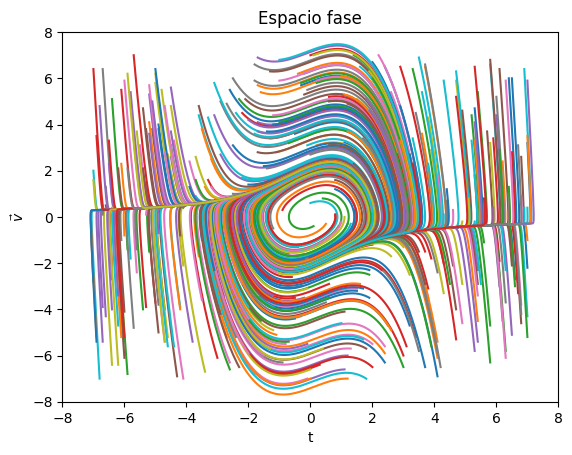

In [4]:
# Para poder graficar muchas condiciones iniciales
using PyPlot
list = -1:0.01:10                      # Intervalo sobre el cual vamos a trabajar
for i in 1:500                         # Vamos a graficar 500 condiciones iniciales
    w = 0.1*rand(-70:70,2,1)
    y1 = metodo_Runge_Kutta(g,list,w); # El vector y1 contiene la solución de nuestro sistema con las condiciones iniciales aleatorias para cada vuelta del ciclo.
    flistx1_kutta = map(x->x[1],y1);   
    flistx2_kutta = map(x->x[2],y1);  
    title("Espacio fase")
    xlabel("t")
    ylabel(L"\vec{v}")  
    plot(flistx1_kutta,flistx2_kutta);
    xmin, xmax = xlim()                # Cambiando la escala de nuestra gráfica
    ymin, ymax = ylim()
    xlim( -8, 8)    
    ylim( -8, 8)
end

El oscilador de van der Pol presenta un ciclo límite estable para $\mu$ mayor que cero. Un ciclo límite es una trayectoria cerrada aislada, lo que implica que las trayectorias vecinas no son cerradas. Es estable si dichas trayectorias se aproximan al ciclo límite.

La forma de la onda estable no es una onda senoidal, como se observa en el espacio (x,t) graficado abajo.

Haciendo $x=u$ y $y=u^{ \prime  }$, se tiene que:

$$x^{ \prime  } =y y^{ \prime  } =-x+\mu (1-{ x }^{ 2 })y$$

El único punto crítico es el origen. Considerando:

$${ \left( \begin{matrix} x \\ y \end{matrix} \right)  }^{ \prime  }=\begin{pmatrix} 0 & 1 \\ -1 & \mu  \end{pmatrix}\left( \begin{matrix} x \\ y \end{matrix} \right) $$

cuyos valores propios están dados por $(\mu \pm \sqrt { { \mu  }^{ 2 }-4 } )/2$. Por lo tanto, el origen es una espiral inestable para $0<\mu <2$ y un nodo inestable para $\mu \ge 2$. 

En nuestro caso, utilizamos $\mu$=0.5, por lo tanto, el origen es una espiral inestable.

Grafiquen varias trayectorias en los espacios $(x,t)$ y $(y=\dot x,t)$

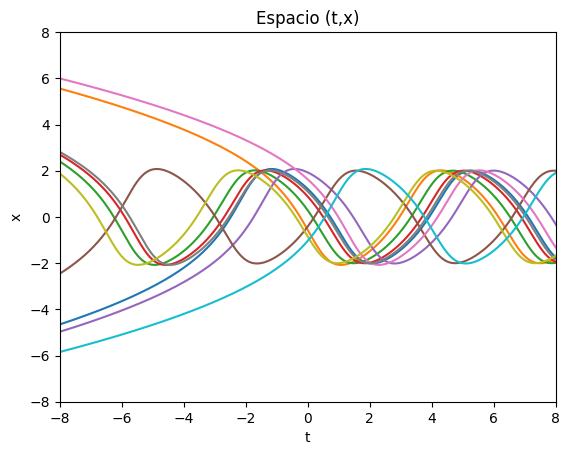

In [5]:
# Para poder graficar muchas condiciones iniciales
using PyPlot
list=-10:0.01:10
for i in 1:10                          # Vamos a graficar 500 condiciones iniciales
    w=0.1*rand(-70:70,2,1)
    y1 = metodo_Runge_Kutta(g,list,w); # El vector y1 contiene la solución de nuestro sistema con las condiciones iniciales aleatorias para cada vuelta del ciclo.
    flistx1_kutta = map(x->x[1],y1);   
    flistx2_kutta = map(x->x[2],y1);  
    title("Espacio (t,x)")
    xlabel("t")
    ylabel("x")  
    plot(list,flistx1_kutta);
    xmin, xmax = xlim()     
    ymin, ymax = ylim()
    xlim( -8, 8)    
    ylim( -8, 8)
end

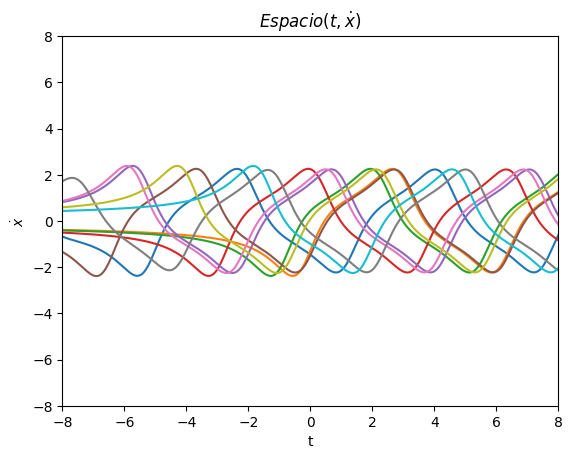

In [6]:
# Para poder graficar muchas condiciones iniciales
using PyPlot
list=-10:0.01:10
for i in 1:10                          # Vamos a graficar 10 condiciones iniciales
    w=0.1*rand(-70:70,2,1)
    y1 = metodo_Runge_Kutta(g,list,w); # El vector y1 contiene la solución de nuestro sistema con las condiciones iniciales aleatorias para cada vuelta del ciclo.
    flistx1_kutta = map(x->x[1],y1);   
    flistx2_kutta = map(x->x[2],y1);  
    title(L"Espacio (t,\dot x)")
    xlabel("t")
    ylabel(L"\dot x")  
    plot(list,flistx2_kutta);
    xmin, xmax = xlim()     
    ymin, ymax = ylim()
    xlim( -8, 8)    
    ylim( -8, 8)
end

## Ejercicio 3: 

Graficar muchas trayectorias del sistema del ejercicio 1 en el espacio de fase. Utílicen rangos apropiados de acuerdo a donde vimos que estan los puntos fijos.

El sistema 1 posee tres puntos fijos, que son (0,0), (-1,1) y el (-1,-1). Por lo mencionado en el primer ejercicio, el origen es un centro no-lineal estable. Cerca del origen, las trayectorias son curvas cerrradas.

Ahora, vamos a ver que tipo de puntos fijos son (-1,1) y (-1,-1). Para el primero de ellos:

Considerando ${ F }_{ 1 }=y-y^3$ y ${ F }_{ 2 }=-x-y^2$, el jacobiano es:

$${ J }_{ F }=\begin{bmatrix} 0 & \quad 1-3y^{ 2 } \\ -1 & \quad -2y \end{bmatrix}$$

Evaluandolo en $(-1,1)$, obtenemos:

$${ J }_{ F }=\begin{bmatrix} 0 & \quad -2 \\ -1 & \quad -2 \end{bmatrix}$$

Calculando el determinante ($\Delta$):

$$\Delta=-2<0$$

Calculando la traza ($\tau$), que es la suma de los elementos de la diagonal:

$$\tau=-2$$

Como el determinante es menor que cero, el punto (-1,1) es un punto silla.

Evaluandolo en $(-1,-1)$, obtenemos:

$${ J }_{ F }=\begin{bmatrix} 0 & \quad -2 \\ -1 & \quad -2 \end{bmatrix}$$

Calculando el determinante ($\Delta$):

$$\Delta=-2<0$$

Calculando la traza ($\tau$), que es la suma de los elementos de la diagonal:

$$\tau=1$$

Como el determinante es menor que cero, el punto (-1,-1) es un punto silla.

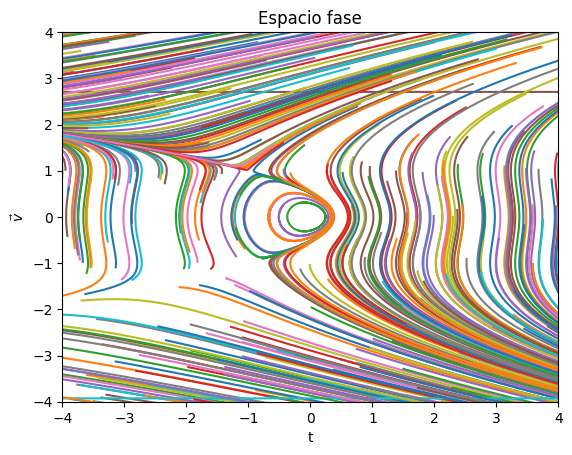

In [7]:
f(x,t) = [x[2]-(x[2])^3, -x[1]-(x[2])^2] # Función de 2 dimensiones

# Para poder graficar muchas condiciones iniciales
using PyPlot
list = -1:0.01:10                        # Intervalo sobre el cual vamos a trabajar
for i in 1:500                           # Vamos a graficar 500 condiciones iniciales
    w = 0.01*rand(-500:500,2,1)          
    y1 = metodo_Runge_Kutta(f,list,w);   # El vector y1 contiene la solución de nuestro sistema con las condiciones iniciales aleatorias para cada vuelta del ciclo.
    flistx1_kutta = map(x->x[1],y1);   
    flistx2_kutta = map(x->x[2],y1);  
    title("Espacio fase")
    xlabel("t")
    ylabel(L"\vec{v}")  
    plot(flistx1_kutta,flistx2_kutta);
    xmin, xmax = xlim()                  # Cambiando la escala de nuestra gráfica
    ymin, ymax = ylim()
    xlim( -4, 4)    
    ylim( -4, 4)
end

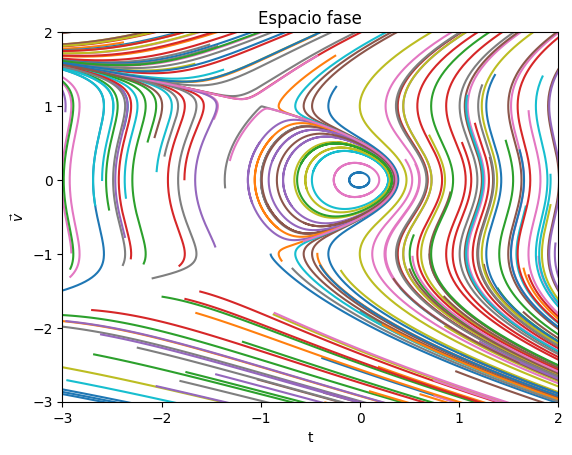

In [30]:
f(x,t) = [x[2]-(x[2])^3, -x[1]-(x[2])^2] # Función de 2 dimensiones

# Para poder graficar muchas condiciones iniciales
using PyPlot
list = -1:0.01:10                        # Intervalo sobre el cual vamos a trabajar
for i in 1:500                           # Vamos a graficar 500 condiciones iniciales
    w = 0.01*rand(-500:500,2,1)          
    y1 = metodo_Runge_Kutta(f,list,w);   # El vector y1 contiene la solución de nuestro sistema con las condiciones iniciales aleatorias para cada vuelta del ciclo.
    flistx1_kutta = map(x->x[1],y1);   
    flistx2_kutta = map(x->x[2],y1);  
    title("Espacio fase")
    xlabel("t")
    ylabel(L"\vec{v}")  
    plot(flistx1_kutta,flistx2_kutta);
    xmin, xmax = xlim()                  # Cambiando la escala de nuestra gráfica
    ymin, ymax = ylim()
    xlim( -3, 2)    
    ylim( -3, 2)
end

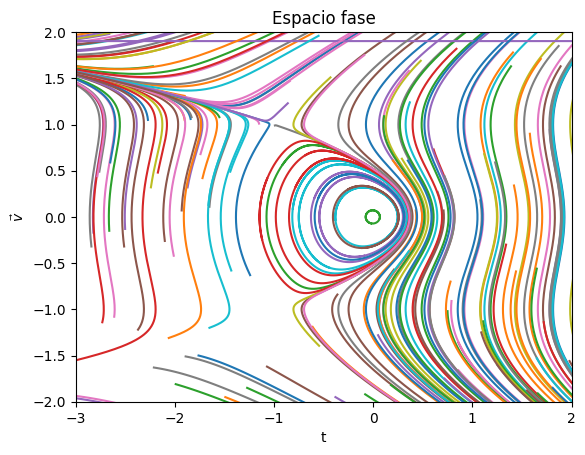

In [36]:
f(x,t) = [x[2]-(x[2])^3, -x[1]-(x[2])^2] # Función de 2 dimensiones

# Para poder graficar muchas condiciones iniciales
using PyPlot
list = -1:0.01:10                        # Intervalo sobre el cual vamos a trabajar
for i in 1:500                           # Vamos a graficar 500 condiciones iniciales
    w = 0.01*rand(-500:500,2,1)          
    y1 = metodo_Runge_Kutta(f,list,w);   # El vector y1 contiene la solución de nuestro sistema con las condiciones iniciales aleatorias para cada vuelta del ciclo.
    flistx1_kutta = map(x->x[1],y1);   
    flistx2_kutta = map(x->x[2],y1);  
    title("Espacio fase")
    xlabel("t")
    ylabel(L"\vec{v}")  
    plot(flistx1_kutta,flistx2_kutta);
    xmin, xmax = xlim()                  # Cambiando la escala de nuestra gráfica
    ymin, ymax = ylim()
    xlim( -3, 2)    
    ylim( -2, 2)
end

Como se observa en el espacio fase, los puntos (-1,1) y (-1,-1) son puntos silla y el origen es un centro no-lineal estable. Cerca del origen, las trayectorias son curvas cerrradas.

## Ejercicio 4: 
Hacer lo mismo para el sistema: 

\begin{align*}
\dot x&= x+y-x (x^2+y^2)\\
\dot y &= y-x-y(x^2+y^2)
\end{align*}

Y comprobar numéricamente que hay un repulsor en $(0,0)$ y un ciclo límite (conjunto atractor) en $x^2+y^2=1$, para cotejar con lo que vimos en clase.

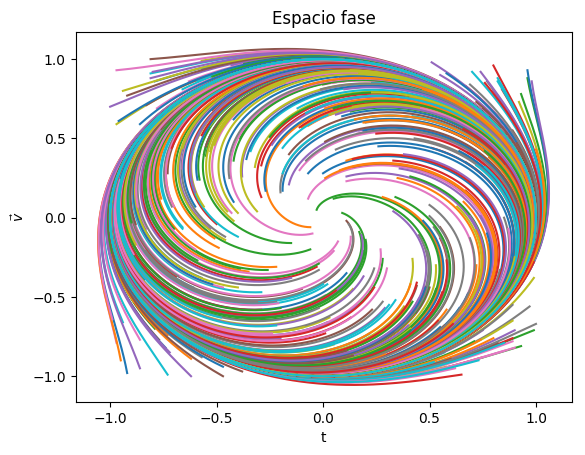

In [8]:
f(x,t) = [x[1]+x[2]-x[1]*((x[1])^2+(x[2])^2), x[2]-x[1]-x[2]*((x[1])^2+(x[2])^2)] # Función de 2 dimensiones

# Para poder graficar muchas condiciones iniciales
using PyPlot
list = -1:0.01:10                        # Intervalo sobre el cual vamos a trabajar
for i in 1:500                           # Vamos a graficar 500 condiciones iniciales
    w = 0.01*rand(-100:100,2,1)          
    y1 = metodo_Runge_Kutta(f,list,w);   # El vector y1 contiene la solución de nuestro sistema con las condiciones iniciales aleatorias para cada vuelta del ciclo.
    flistx1_kutta = map(x->x[1],y1);   
    flistx2_kutta = map(x->x[2],y1);  
    title("Espacio fase")
    xlabel("t")
    ylabel(L"\vec{v}")  
    plot(flistx1_kutta,flistx2_kutta);
end

Considerando ${ F }_{ 1 }=x+y-x(x^2+y^2)$ y ${ F }_{ 2 }=y-x-y(x^2+y^2)$, el jacobiano es:

$${ J }_{ F }=\begin{bmatrix} 1-3{ x }^{ 2 }-{ y }^{ 2 } & \quad 1-2xy \\ -1-2x & \quad 1-3{ y }^{ 2 } \end{bmatrix}$$

Evaluandolo en el punto (0,0), tenemos:

$${ J }_{ F }=\begin{bmatrix} 1 & \quad 1 \\ -1 & \quad 1 \end{bmatrix}$$

cuyos valores propios son: ${ \lambda  }_{ 1 }=1+i$ y ${ \lambda  }_{ 2 }=1-i$

Ambos valores propios tienen parte real positiva, por lo que que el punto (0,0) es un repulsor y por consiguiente, las trayectorias tienden a alejarse del origen.

Utilizando coordenadas polares r y $\theta $, con:

$$x=rcos\theta $$ y $$x=rcos\theta $$

Multiplicando ${ F }_{ 1 }$ por x y ${ F }_{ 2 }$ por y, obtenemos:

$$ x\frac { dx }{ dt } +y\frac { dy }{ dt } =({ x }^{ 2 }+{ y }^{ 2 })-{ ({ x }^{ 2 }+{ y }^{ 2 }) }^{ 2 } $$

Como ${ r }^{ 2 }={ x }^{ 2 }+{ y }^{ 2 }$ y $r(dr/dt)=x(dx/dt)+y(dy/dt)$, entonces:

$$r\frac { dr }{ dt } ={ r }^{ 2 }(1-{ r }^{ 2 })$$

Los puntos críticos para $r\ge 0$ son el origen y el punto r=1, que corresponde al círculo unitario $x^2+y^2=1$ en el espacio fase (como se muestra en la figura). Dentro de este círculo, las trayectorias se mueven hacia afuera de él, mientras que las trayectorias que están afuera se mueven acercandose a él.

Para cuando el tiempo tiende a infinito, este ciclo límite atrae las trayectorias no cerradas hacia él. Estas trayectorias se mueven en espiral acercandose al ciclo límite y por lo tanto es un conjunto atractor.

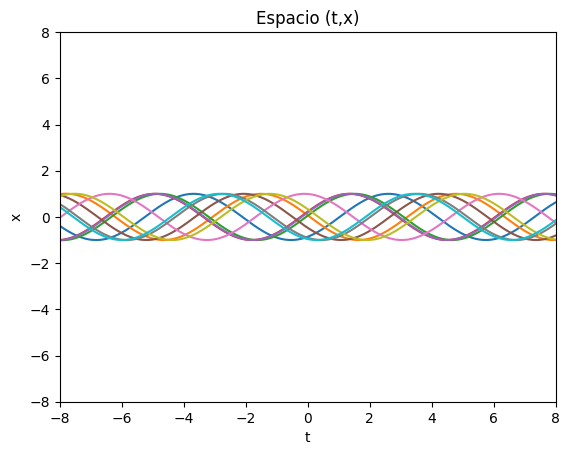

In [9]:
# Para poder graficar muchas condiciones iniciales
using PyPlot
list=-10:0.01:10
for i in 1:10                          # Vamos a graficar 500 condiciones iniciales
    w=0.1*rand(-70:70,2,1)
    y1 = metodo_Runge_Kutta(f,list,w); # El vector y1 contiene la solución de nuestro sistema con las condiciones iniciales aleatorias para cada vuelta del ciclo.
    flistx1_kutta = map(x->x[1],y1);   
    flistx2_kutta = map(x->x[2],y1);  
    title("Espacio (t,x)")
    xlabel("t")
    ylabel("x")  
    plot(list,flistx1_kutta);
    xmin, xmax = xlim()     
    ymin, ymax = ylim()
    xlim( -8, 8)    
    ylim( -8, 8)
end

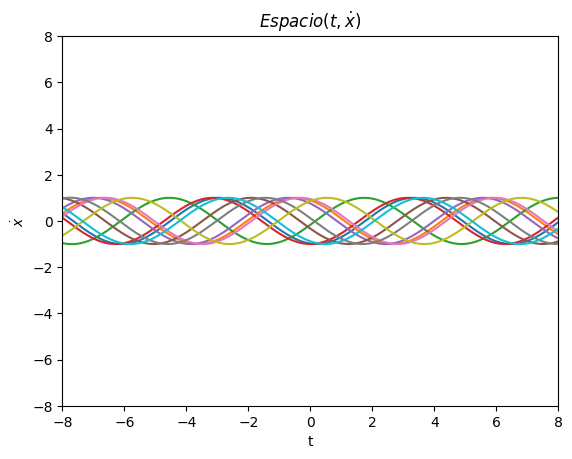

In [10]:
# Para poder graficar muchas condiciones iniciales
using PyPlot
list=-10:0.01:10
for i in 1:10                          # Vamos a graficar 10 condiciones iniciales
    w=0.1*rand(-70:70,2,1)
    y1 = metodo_Runge_Kutta(f,list,w); # El vector y1 contiene la solución de nuestro sistema con las condiciones iniciales aleatorias para cada vuelta del ciclo.
    flistx1_kutta = map(x->x[1],y1);   
    flistx2_kutta = map(x->x[2],y1);  
    title(L"Espacio (t,\dot x)")
    xlabel("t")
    ylabel(L"\dot x")  
    plot(list,flistx2_kutta);
    xmin, xmax = xlim()     
    ymin, ymax = ylim()
    xlim( -8, 8)    
    ylim( -8, 8)
end